In [12]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [13]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'  
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
DATA_TEST_PATH = '../data/test.csv' 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

## Do your thing crazy machine learning thing here :) ...

In [14]:
from proj1_utils import *
from proj1_visualization import *
from proj1_cross_validation import *
from implementations import *

### Explore the data

In [15]:
cat_cols = [22]           # PRI_jet_num: the only categorical column
tX_num, tX_cat = split_numerical_categorical(tX,cat_cols)

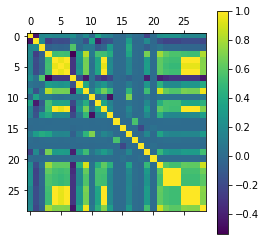

In [6]:
plt.matshow(np.corrcoef(tX_num,rowvar=False))
plt.colorbar()

In [7]:
np.corrcoef(tX_num[:,22:25],rowvar = False)

array([[1.        , 0.99610001, 0.9960998 ],
       [0.99610001, 1.        , 0.99999184],
       [0.9960998 , 0.99999184, 1.        ]])

In [8]:
np.corrcoef(tX_num[:,25:28],rowvar = False)

array([[1.        , 0.99935235, 0.99935185],
       [0.99935235, 1.        , 0.99999477],
       [0.99935185, 0.99999477, 1.        ]])

In [10]:
corr_cols = [4,6,25,26,23,24]
tX_num_uncorr = np.delete(tX_num,corr_cols,axis = 1)

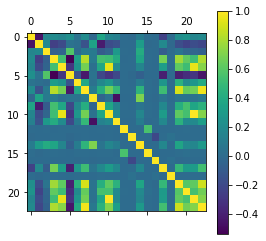

In [11]:
plt.matshow(np.corrcoef(tX_num_uncorr,rowvar=False))
plt.colorbar()

In [30]:
tX_test_num, tX_test_cat = split_numerical_categorical(tX_test,cat_cols)

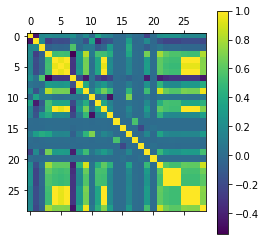

In [13]:
plt.matshow(np.corrcoef(tX_test_num,rowvar=False))
plt.colorbar()

In [14]:
tX_test_num_uncorr = np.delete(tX_test_num,corr_cols,axis = 1)

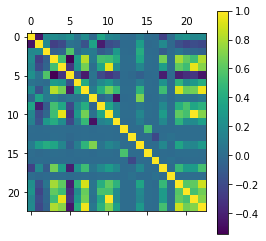

In [15]:
plt.matshow(np.corrcoef(tX_test_num_uncorr,rowvar=False))
plt.colorbar()

## Preprocessing

In [27]:
# Treat numerical values
best_degree = 5
#full_x_train_num_nan = replace_undef_val_with_nan(tX_num_uncorr)
full_x_train_num_nan = replace_undef_val_with_nan(tX_num)
full_x_train_num_std, train_mean, train_std = nan_standardize_fit(full_x_train_num_nan)
# full_x_train_num_valid_std = replace_nan_val_with_mean(full_x_train_num_nan_std)
full_x_train_num_valid = replace_nan_val_with_median(full_x_train_num_std)
full_x_train_num_valid = replace_iqr_outliers(full_x_train_num_valid)
# Treat categorical values
full_x_train_ohe_cat = one_hot_encode(tX_cat)
full_x_train_poly = build_poly(full_x_train_num_valid , best_degree)
full_x_train = np.hstack((full_x_train_poly,full_x_train_ohe_cat))
# Treat labels
full_y_train = y
# full_y_train = relabel_y_non_negative(y).reshape(-1,1)

In [28]:
x_train, y_train, x_val, y_val = split_data(full_x_train,full_y_train,0.8)

In [31]:
# Treat numerical values
x_test_num_nan = replace_undef_val_with_nan(tX_test_num)
x_test_num_nan_std = nan_standardize_transform(x_test_num_nan,train_mean,train_std)
# x_test_num_nan_std = nan_standardize_with_median_transform(x_test_num_nan,train_median,train_std)
x_test_num_valid_std = replace_nan_val_with_median(x_test_num_nan_std)
x_test_num_valid_std = replace_iqr_outliers(x_test_num_valid_std)
# x_test_num_valid_std = replace_nan_val_with_mean(x_test_num_nan_std)
x_test_ohe_cat = one_hot_encode(tX_test_cat)
x_test_poly = build_poly(x_test_num_valid_std , best_degree)
x_test = np.hstack((x_test_poly,x_test_ohe_cat))

In [ ]:
multiHistPlots(tX_num_uncorr)

## Test grid search

### Least squares GD

In [57]:
method_flag = 1
degrees = np.asarray(range(1,4))
lambdas = np.asarray([0])
best_degree, best_lambda, accuracy_score, accuracy_scores_grid = degree_lambda_grid_search(y,tX,[22],0.8,method_flag,degrees,lambdas)
print(best_degree)
print(best_lambda)
print(accuracy_score)
print(accuracy_scores_grid)

GD(1/1999): loss=0.49999945001730517, w0=-3.1503000000000004e-07, w1=1.1441435393875164e-07
GD(51/1999): loss=0.4999719543776745, w0=-1.6065761678670137e-05, w1=5.834938817029493e-06
GD(101/1999): loss=0.49994446558980826, w0=-3.1814986957753016e-05, w1=1.1555084412194887e-05
GD(151/1999): loss=0.49991698365161474, w0=-4.756270600479256e-05, w1=1.7274851172060363e-05
GD(201/1999): loss=0.49988950856100184, w0=-6.330891898731048e-05, w1=2.299423912924805e-05
GD(251/1999): loss=0.49986204031587933, w0=-7.905362607280616e-05, w1=2.8713248316376766e-05
GD(301/1999): loss=0.4998345789141566, w0=-9.479682742875676e-05, w1=3.443187876606203e-05
GD(351/1999): loss=0.4998071243537451, w0=-0.00011053852322261727, w1=4.015013051091601e-05
GD(401/1999): loss=0.4997796766325555, w0=-0.00012627871362182045, w1=4.586800358354759e-05
GD(451/1999): loss=0.4997522357485006, w0=-0.0001420173987937767, w1=5.158549801656232e-05
GD(501/1999): loss=0.499724801699493, w0=-0.00015775457890587435, w1=5.73026138

GD(451/1999): loss=0.49880360980102084, w0=-0.00014158203134972153, w1=5.156015665837525e-05
GD(501/1999): loss=0.49867191024718394, w0=-0.00015721738993529987, w1=5.727134325686747e-05
GD(551/1999): loss=0.49854039669755074, w0=-0.00017284059411080293, w1=6.298153034872556e-05
GD(601/1999): loss=0.49840906882486136, w0=-0.00018845165490520742, w1=6.869071844759857e-05
GD(651/1999): loss=0.4982779263025176, w0=-0.00020405058333571906, w1=7.43989080663969e-05
GD(701/1999): loss=0.49814696880457987, w0=-0.00021963739040778703, w1=8.01060997172934e-05
GD(751/1999): loss=0.4980161960057666, w0=-0.00023521208711511782, w1=8.58122939117248e-05
GD(801/1999): loss=0.4978856075814526, w0=-0.0002507746844396896, w1=9.151749116039321e-05
GD(851/1999): loss=0.49775520320766764, w0=-0.0002663251933517663, w1=9.722169197326711e-05
GD(901/1999): loss=0.4976249825610944, w0=-0.00028186362480991164, w1=0.00010292489685958282
GD(951/1999): loss=0.49749494531906824, w0=-0.0002973899897610039, w1=0.000108

### Least squares SGD

In [55]:
method_flag = 2
degrees = np.asarray(range(1,6))
lambdas = np.asarray([0])
best_degree, best_lambda, accuracy_score, accuracy_scores_grid = degree_lambda_grid_search(y,tX,[22],0.8,method_flag,degrees,lambdas)
print(best_degree)
print(best_lambda)
print(accuracy_score)
print(accuracy_scores_grid)

SGD(50/2000): loss=0.4999560328730805, w(0)=-1.7999494721739857e-05, w1=3.5480791707477293e-06
SGD(100/2000): loss=0.5001926794149707, w(0)=-3.399670654765714e-05, w1=1.0489958052191082e-05
SGD(150/2000): loss=0.4996817964838604, w(0)=-5.1992623872818504e-05, w1=1.3375506850854295e-05
SGD(200/2000): loss=0.49961034577844315, w(0)=-7.198936799854934e-05, w1=2.36637956134491e-05
SGD(250/2000): loss=0.5003647068815094, w(0)=-8.39825402078926e-05, w1=2.823389416660846e-05
SGD(300/2000): loss=0.49992163320844546, w(0)=-0.00010997139578886805, w1=3.3456361532792676e-05
SGD(350/2000): loss=0.49938066192564445, w(0)=-0.0001299581496448557, w1=3.814024383261656e-05
SGD(400/2000): loss=0.4995744662692441, w(0)=-0.00014594592209955548, w1=3.7837670888478076e-05
SGD(450/2000): loss=0.5005391964889622, w(0)=-0.00015792810810679348, w1=4.704865296964899e-05
SGD(500/2000): loss=0.5001973942162212, w(0)=-0.00017790936626798227, w1=5.55638469687169e-05
SGD(550/2000): loss=0.5000674954478292, w(0)=-0.00

SGD(350/2000): loss=0.49802377980740137, w(0)=-9.976946632167817e-05, w1=5.3045904682887175e-05
SGD(400/2000): loss=0.4985549066697162, w(0)=-0.00011368578373648375, w1=5.8173611147130814e-05
SGD(450/2000): loss=0.5001220725584077, w(0)=-0.00012760792876787393, w1=6.941220978822826e-05
SGD(500/2000): loss=0.49617258762761807, w(0)=-0.0001454994499132223, w1=7.057521877947946e-05
SGD(550/2000): loss=0.5011661275757886, w(0)=-0.0001553972033067043, w1=7.806323806288272e-05
SGD(600/2000): loss=0.49545429233765625, w(0)=-0.0001692830815274375, w1=8.32657790262584e-05
SGD(650/2000): loss=0.5018283159412038, w(0)=-0.0001871594960338809, w1=8.656123624170673e-05
SGD(700/2000): loss=0.4951778131186983, w(0)=-0.00020102646223981588, w1=8.914234176609244e-05
SGD(750/2000): loss=0.493698591206773, w(0)=-0.00020686978903618468, w1=9.116747917620688e-05
SGD(800/2000): loss=0.5071827756469156, w(0)=-0.00021869831090553265, w1=0.00010180492886650803
SGD(850/2000): loss=0.4933540814078508, w(0)=-0.000

SGD(650/2000): loss=0.4936524960104771, w(0)=-0.0001698398400417495, w1=6.527983624782829e-05
SGD(700/2000): loss=0.44446132218736895, w(0)=-0.00018862806613884303, w1=6.910166864176832e-05
SGD(750/2000): loss=0.49566579168689695, w(0)=-0.00020851328214604537, w1=7.337558238246342e-05
SGD(800/2000): loss=0.48530526170458227, w(0)=-0.0002240096306553932, w1=8.422143684947854e-05
SGD(850/2000): loss=0.5077582902571349, w(0)=-0.0002405508154003204, w1=8.97949147277002e-05
SGD(900/2000): loss=0.49644595668857816, w(0)=-0.0002622126951201993, w1=9.197231633082656e-05
SGD(950/2000): loss=0.5040680234408969, w(0)=-0.00027122442664188315, w1=9.796916326162179e-05
SGD(1000/2000): loss=0.4736012845469952, w(0)=-0.0002891467345921166, w1=0.00011064026626367453
SGD(1050/2000): loss=0.5103118100864821, w(0)=-0.0003099829354390571, w1=0.00011802846187998188
SGD(1100/2000): loss=0.46531659555814003, w(0)=-0.0003208776781153035, w1=0.0001235027509914114
SGD(1150/2000): loss=0.5074804291614698, w(0)=-0

### Least squares

In [51]:
method_flag = 3
degrees = np.asarray(range(1,11))
lambdas = np.asarray([0])
best_degree, best_lambda, accuracy_score, accuracy_scores_grid = degree_lambda_grid_search(y,tX,[22],0.8,method_flag,degrees,lambdas)
print(best_degree)
print(best_lambda)
print(accuracy_score)
print(accuracy_scores_grid)

1
0
0.6566
[[0.6566]
 [0.3434]
 [0.3434]
 [0.3434]
 [0.6566]
 [0.6566]
 [0.6566]
 [0.3434]
 [0.3434]
 [0.6566]]


### Ridge regression

In [49]:
method_flag = 4
degrees = np.asarray(range(1,10))
lambdas = np.logspace(-10,0,11)
best_degree, best_lambda, accuracy_score, accuracy_scores_grid = degree_lambda_grid_search(y,tX,[22],0.8,method_flag,degrees,lambdas)
print(best_degree)
print(best_lambda)
print(accuracy_score)
print(accuracy_scores_grid)

7
1e-05
0.81796
[[0.7472  0.7472  0.7472  0.7472  0.7472  0.7472  0.74716 0.74722 0.74524
  0.7368  0.7141 ]
 [0.7976  0.7976  0.7976  0.7976  0.7976  0.79758 0.79764 0.79778 0.79572
  0.78564 0.7342 ]
 [0.81312 0.81312 0.81312 0.81312 0.81316 0.81308 0.81294 0.81306 0.80954
  0.79208 0.74434]
 [0.81652 0.81652 0.81652 0.81652 0.8166  0.81652 0.8163  0.8158  0.8109
  0.79326 0.75144]
 [0.81682 0.81682 0.8168  0.81688 0.817   0.81688 0.81668 0.81608 0.81152
  0.7954  0.75406]
 [0.8169  0.8169  0.8169  0.8169  0.817   0.817   0.81724 0.81592 0.81226
  0.79798 0.757  ]
 [0.81764 0.81766 0.81772 0.81776 0.8177  0.81796 0.8177  0.8162  0.81238
  0.7986  0.75744]
 [0.81658 0.8166  0.81656 0.8165  0.8172  0.81764 0.81724 0.81626 0.81274
  0.79916 0.75818]
 [0.81654 0.81656 0.81668 0.81678 0.81752 0.81786 0.81766 0.81642 0.81342
  0.8     0.75708]]


### Logistic regression

In [58]:
method_flag = 5
degrees = np.asarray(range(1,4))
lambdas = np.logspace(-7,0,8)
best_degree, best_lambda, accuracy_score, accuracy_scores_grid = degree_lambda_grid_search(y,tX,[22],0.8,method_flag,degrees,lambdas)
print(best_degree)
print(best_lambda)
print(accuracy_score)
print(accuracy_scores_grid)

#Iteration: 0, Loss: 138629.4361119856
#Iteration: 250, Loss: 103384.51325763622
#Iteration: 500, Loss: 102473.3534760032
#Iteration: 750, Loss: 101989.73481291284
#Iteration: 1000, Loss: 101711.39709745989
#Iteration: 1250, Loss: 101545.3295208861
#Iteration: 1500, Loss: 101443.84265658101
#Iteration: 1750, Loss: 101380.64654471242
#Iteration: 2000, Loss: 101340.64371542702
#Iteration: 0, Loss: 138629.4361119856
#Iteration: 250, Loss: 86557.5528287275
#Iteration: 500, Loss: 85379.48974339946
#Iteration: 750, Loss: 84967.39846623022
#Iteration: 1000, Loss: 84743.50226234547
#Iteration: 1250, Loss: 84598.95296357662
#Iteration: 1500, Loss: 84498.19457693736
#Iteration: 1750, Loss: 84425.13566641122
#Iteration: 2000, Loss: 84370.88533114741
#Iteration: 0, Loss: 138629.4361119856
#Iteration: 250, Loss: 85004.81546502894
#Iteration: 500, Loss: 83617.21034856312
#Iteration: 750, Loss: 83093.430842894
#Iteration: 1000, Loss: 82801.74686093649
#Iteration: 1250, Loss: 82609.61905087414
#Iterat

#Iteration: 0, Loss: 138629.4361119856
#Iteration: 250, Loss: 86557.5528287275
#Iteration: 500, Loss: 85379.48974339946
#Iteration: 750, Loss: 84967.39846623022
#Iteration: 1000, Loss: 84743.50226234547
#Iteration: 1250, Loss: 84598.95296357662
#Iteration: 1500, Loss: 84498.19457693736
#Iteration: 1750, Loss: 84425.13566641122
#Iteration: 2000, Loss: 84370.88533114741
#Iteration: 0, Loss: 138629.4361119856
#Iteration: 250, Loss: 85004.81546502894
#Iteration: 500, Loss: 83617.21034856312
#Iteration: 750, Loss: 83093.430842894
#Iteration: 1000, Loss: 82801.74686093649
#Iteration: 1250, Loss: 82609.61905087414
#Iteration: 1500, Loss: 82470.81708593006
#Iteration: 1750, Loss: 82364.77216959509
#Iteration: 2000, Loss: 82280.78515168035
3
1e-07
0.81456
[[0.74986 0.74986 0.74986 0.74986 0.74986 0.74986 0.74986 0.74986]
 [0.81092 0.81092 0.81092 0.81092 0.81092 0.81092 0.81092 0.81092]
 [0.81456 0.81456 0.81456 0.81456 0.81456 0.81456 0.81456 0.81456]]


### Regularized logistic regression 

In [6]:
method_flag = 5
degrees = np.asarray(range(1,4))
lambdas = np.logspace(-7,0,8)
best_degree, best_lambda, accuracy_score, accuracy_scores_grid = degree_lambda_grid_search(y,tX,[22],0.8,method_flag,degrees,lambdas)
print(best_degree)
print(best_lambda)
print(accuracy_score)
print(accuracy_scores_grid)

#Iteration: 0, Loss: 138629.4361119856
#Iteration: 250, Loss: 103384.51325763622
#Iteration: 500, Loss: 102473.3534760032
#Iteration: 750, Loss: 101989.73481291284
#Iteration: 1000, Loss: 101711.39709745989
#Iteration: 1250, Loss: 101545.3295208861
#Iteration: 1500, Loss: 101443.84265658101
#Iteration: 1750, Loss: 101380.64654471242
#Iteration: 2000, Loss: 101340.64371542702
#Iteration: 0, Loss: 138629.4361119856
#Iteration: 250, Loss: 86557.5528287275


KeyboardInterrupt: 

## Ridge regression

In [41]:
best_lambda = 1e-5
lambda_ = best_lambda
weights, loss = ridge_regression(y_train,x_train,lambda_)

## Least squares

In [ ]:
# weights = least_squares(y_train,x_train)

## Test crossvalidation

In [34]:
method_flag = 4
k_fold = 4
degree = 2
lambda_ = 1e-5
gamma = 2.2e-6
max_iters = 2000 
losses_tr, losses_va, accuracy_scores = k_fold_cross_validation(full_y_train,full_x_train,method_flag,k_fold,degree,lambda_,gamma,max_iters)
print(losses_tr)
print(losses_va)
print(accuracy_scores)


[0.35685957 0.35626687 0.35658606 0.356024  ]
[0.84254684 0.84540164 0.84412591 0.84552185]
[0.742528 0.73768  0.740496 0.739296]


## Generate predictions and save ouput in csv format for submission:

In [42]:
y_pred = predict_labels(weights, x_val)
y_val = relabel_y_negative(y_val)

In [43]:
# Just to check
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, recall_score, precision_score
print(confusion_matrix(y_val,y_pred))
print(accuracy_score(y_val,y_pred))
print(f1_score(y_val,y_pred))
print(recall_score(y_val,y_pred))
print(precision_score(y_val,y_pred))

[[29050  3720]
 [ 5552 11678]]
0.81456
0.7158268971435577
0.677771329077191
0.7584101831406677


In [44]:
get_label_y_counts(y_pred)

(array([-1.,  1.]), array([34602, 15398]))

In [46]:
OUTPUT_PATH = '../results/ridge_reg_submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, x_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)